In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from skimage import color
from torchvision import transforms, datasets

### Prepare Dataset

In [18]:
import glob
import os

In [23]:
if False:
    x = glob.glob('./images/*')
    train = x[:int(len(x)*.8)]
    test = x[int(len(x)*.8):]

    train_dir = './images/train'
    test_dir = './images/test'
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
        for d in train:
            os.rename(d,train_dir + '/' + d.split('/')[-1])

    if not os.path.exists(test_dir):
        os.makedirs(test_dir)
        for d in test:
            os.rename(d,test_dir + '/' + d.split('/')[-1])

In [24]:
class ToLAB(object):
    """Convert (RGB) PIL image to LAB color space
    """

    def __init__(self):
        pass

    def __call__(self, image):
        return color.rgb2lab(image)

In [78]:
data_transform = transforms.Compose([transforms.Resize((224,224)),
                                     ToLAB(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0,0,0],
                                     std=[255,255,255]),])
allImages = datasets.ImageFolder(root='./images',transform = data_transform)
dataloader = torch.utils.data.DataLoader(allImages,batch_size = 64)

In [79]:
converter = lambda x: np.moveaxis(x.cpu().numpy()*255,0,2)

In [80]:
x.shape

torch.Size([1, 3, 224, 224])

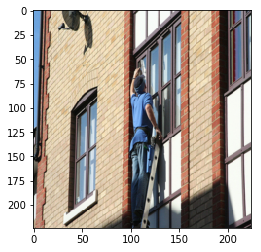

In [77]:
plt.imshow(color.lab2rgb(converter(x[0])))